In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# **IMDB DATASET**

as_supervised:

 bool if True, the returned tf.data.Dataset
    will have a 2-tuple structure (input, label) according to
    builder.info.supervised_keys. If False, the default,
    the returned tf.data.Dataset will have a dictionary with all the
    features.

In [ ]:
imdb,info=tfds.load("imdb_reviews",as_supervised=True,with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2FIRJB/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2FIRJB/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2FIRJB/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [ ]:
imdb       #It is a dictionary

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [ ]:
imdb['train']   # Datasetobject

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [ ]:
example=(iter(imdb['train']).next())
example   # Return tuple

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>)

In [ ]:
print(example[0])
print()
print(example[0].numpy())
print()
print(example[0].numpy().decode('utf-8'))
print()
print(example[1])
print()
print(example[1].numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storylin

In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)   #  Labels Need to converted into arrays.
testing_labels_final = np.array(testing_labels)

In [ ]:
training_sentences[:5]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [ ]:
training_labels[:5]

[0, 0, 0, 1, 1]

In [ ]:
training_labels_final.shape,testing_labels_final.shape

((25000,), (25000,))

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)   #  Arguments:sequences: List of sequences (each sequence is a list of integers)-Returns:Numpy array with shape `(len(sequences), maxlen)`

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'most':

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(padded[3])
print(decode_review(padded[3]))
print(training_sentences[3])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   12    7    2  241    5   20   16    4 8776 2707 2653
   52    2  358    5    2  180   68  138 1401   17   92  203  968   15
   23    1   81    4  192 3109 3037    3    1   16    4  376    5  632
  387  352   37 6355    3 5559 1928   15  208 8596 3433    2  112  365
   48   24   55    1    6 1657   55 1818 4312   41    4 2263    3 1908
    1  141  160  780  111   31   92  116    4  221   20    9  173  279
    3   29   13 1012    2 2814   10 1985]
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm 

# Embedding Layer
 
 **input_dim	Integer-.** Size of the vocabulary, i.e. maximum integer index + 1.

**output_dim	Integer-** Dimension of the dense embedding.

**input_length-**	Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).

**Input shape:**
2D tensor with shape: (batch_size, input_length).

Output shape:
3D tensor with shape: (batch_size, input_length, output_dim).

In [ ]:
model=tf.keras.Sequential([
   tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(6,activation='relu'),
   tf.keras.layers.Dense(1,activation='sigmoid')                        
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.6121 - accuracy: 0.6266 - val_loss: 0.3485 - val_accuracy: 0.8463
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2465 - accuracy: 0.9027 - val_loss: 0.3576 - val_accuracy: 0.8438
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0988 - accuracy: 0.9765 - val_loss: 0.4458 - val_accuracy: 0.8288
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0247 - accuracy: 0.9967 - val_loss: 0.5217 - val_accuracy: 0.8277
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0061 - accuracy: 0.9997 - val_loss: 0.5869 - val_accuracy: 0.8292
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6394 - val_accuracy: 0.8293
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 9.2154e-04 - accuracy: 1.0000 - val_loss: 0.6826 - val_accuracy: 0.8308
Ep

In [ ]:
model.layers

In [ ]:
e = model.layers[0]   # Embedding layer
weights = e.get_weights()[0]   # e.get_weights() will output list of length 1.
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
dense_1_weights=model.layers[2].get_weights()  # output list of weights + biases
print(dense_1_weights)
print('Weights shape',dense_1_weights[0].shape)
print('biases shape',dense_1_weights[1].shape)

[array([[-0.04971122, -0.136914  , -0.13231392, -0.03096761, -0.17944936,
        -0.05058313],
       [ 0.3018779 , -0.23014566, -0.24781097,  0.3150443 , -0.3231818 ,
         0.32768148],
       [-0.05528463, -0.02436292,  0.07819934, -0.05736092, -0.0238096 ,
        -0.02325527],
       ...,
       [ 0.13228442, -0.20831522, -0.1333479 ,  0.07078002, -0.21430711,
         0.13558409],
       [-0.07797492,  0.00323589,  0.06817918,  0.01777759,  0.05068883,
         0.01887364],
       [ 0.19815242, -0.24539588, -0.254905  ,  0.2589672 , -0.250771  ,
         0.36021236]], dtype=float32), array([0.1024178 , 0.13064855, 0.10958942, 0.10412934, 0.15638249,
       0.06858818], dtype=float32)]
Weights shape (1920, 6)
biases shape (6,)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


# Sarcasam dataset 

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-04-02 11:34:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2021-04-02 11:34:05 (122 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open('/tmp/sarcasm.json',mode='r') as f:
  datastore=json.load(f)

datastore[:2]  # list of dictionary each element is a dictionary containing key,Value pairs.


[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0}]

In [ ]:
sentences=[]
labels=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

len(sentences)  

26709

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [ ]:
type(training_padded),training_padded.shape

(numpy.ndarray, (20000, 100))

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)  # Already it is in 2d array not needed
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)    # Already it is in 2d array not needed
testing_labels = np.array(testing_labels)

In [ ]:
print('training_padded shape',training_padded.shape)
print('training_labels shape',testing_labels.shape)
print('testing_padded shape',testing_padded.shape)
print('testing_labels shape',testing_labels.shape)

training_padded shape (20000, 100)
training_labels shape (6709,)
testing_padded shape (6709, 100)
testing_labels shape (6709,)


In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 9606      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 169,613
Trainable params: 169,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(training_padded,training_labels,epochs=30,validation_data=(testing_padded,testing_labels),verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.4783 - accuracy: 0.7531 - val_loss: 0.3242 - val_accuracy: 0.8568
Epoch 2/30
625/625 - 2s - loss: 0.2185 - accuracy: 0.9154 - val_loss: 0.3170 - val_accuracy: 0.8633
Epoch 3/30
625/625 - 2s - loss: 0.1193 - accuracy: 0.9604 - val_loss: 0.3377 - val_accuracy: 0.8656
Epoch 4/30
625/625 - 2s - loss: 0.0600 - accuracy: 0.9830 - val_loss: 0.3985 - val_accuracy: 0.8600
Epoch 5/30
625/625 - 2s - loss: 0.0272 - accuracy: 0.9941 - val_loss: 0.4503 - val_accuracy: 0.8565
Epoch 6/30
625/625 - 2s - loss: 0.0123 - accuracy: 0.9982 - val_loss: 0.5051 - val_accuracy: 0.8550
Epoch 7/30
625/625 - 2s - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.5599 - val_accuracy: 0.8553
Epoch 8/30
625/625 - 2s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.6059 - val_accuracy: 0.8515
Epoch 9/30
625/625 - 2s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.6435 - val_accuracy: 0.8535
Epoch 10/30
625/625 - 2s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.6903 - val_accuracy: 0.8504

In [ ]:
history.history             # It gives you the dictionary

{'accuracy': [0.7531499862670898,
  0.9154000282287598,
  0.9603999853134155,
  0.9830499887466431,
  0.9940999746322632,
  0.998199999332428,
  0.9994000196456909,
  0.9994000196456909,
  0.9995499849319458,
  0.9994999766349792,
  0.999750018119812,
  0.9997000098228455,
  0.9996500015258789,
  0.9996500015258789,
  0.9996500015258789,
  0.9997000098228455,
  0.9995999932289124,
  0.999750018119812,
  0.9996500015258789,
  0.9998499751091003,
  0.999750018119812,
  0.9996500015258789,
  0.9998000264167786,
  0.9996500015258789,
  0.999750018119812,
  0.999750018119812,
  0.9998499751091003,
  0.9996500015258789,
  0.9998999834060669,
  0.9995999932289124],
 'loss': [0.4783115088939667,
  0.21848899126052856,
  0.11933661997318268,
  0.059980131685733795,
  0.027199825271964073,
  0.012261600233614445,
  0.006140273530036211,
  0.0034194164909422398,
  0.002439280040562153,
  0.0017799127381294966,
  0.0013511332217603922,
  0.001386381802149117,
  0.0011455754283815622,
  0.001128402

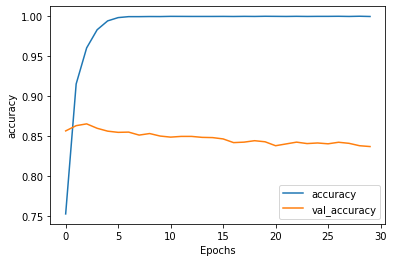

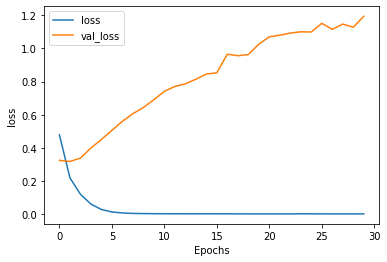

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, 'PAD') for i in text])
print(training_padded[0])
print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD
mom starting to fear son's web series closest thing she will h

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


# INFERENCE

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.9957769 ]
 [0.00237301]]


## IMDB DATASET(SUBWORD8K)  PRE-TOKENIZED DATASET

https://github.com/tensorflow/datasets/blob/master/docs/catalog/imdb_reviews.md

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYJFVUX/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYJFVUX/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYJFVUX/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']   #Data we get is already preprocess

In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [ ]:
tokenizer = info.features['text'].encoder  # Trained tokenizer 

In [ ]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
len(tokenizer.subwords)

7928

In [ ]:
tokenizer.vocab_size

8185

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)           # encode method to convert string into sequences
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)          # decode method to convert list of sequences into string
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
print(type(train_data))
train_data.element_spec

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


(TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
example=(iter(train_data).next())      # train_data is already tokenize into sequences no need to convert into sequences
print(example)  # Return tuple
print('------------------------------------------------------------------------------------------------------------------------------------------')
print(iter(imdb['train']).next())

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None, None), dtype=tf.int64, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
#Each batch is having equal sequence length but every batch  has different input length. 

In [ ]:
iter(train_dataset).next()

(<tf.Tensor: shape=(64, 1252), dtype=int64, numpy=
 array([[ 249,    4, 2256, ...,    0,    0,    0],
        [4728,    3,  661, ...,    0,    0,    0],
        [  12,   31,  140, ...,    0,    0,    0],
        ...,
        [4728,    2,   14, ...,    0,    0,    0],
        [3503, 7087, 1469, ...,    0,    0,    0],
        [  12,  284,  107, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64,), dtype=int64, numpy=
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])>)

In [ ]:
iter(train_dataset).next()

(<tf.Tensor: shape=(64, 846), dtype=int64, numpy=
 array([[1284,  982,   66, ...,    0,    0,    0],
        [  12,  284,    1, ...,    0,    0,    0],
        [  12,  582,    1, ...,    0,    0,    0],
        ...,
        [5347, 5724,  127, ...,    0,    0,    0],
        [ 133,  266,  434, ...,    0,    0,    0],
        [ 552, 4460, 8011, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64,), dtype=int64, numpy=
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])>)

In [ ]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),       # input_lenght is variable here
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 17s 40ms/step - loss: 0.6916 - accuracy: 0.5251 - val_loss: 0.6493 - val_accuracy: 0.7360
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 0.5964 - accuracy: 0.7533 - val_loss: 0.4638 - val_accuracy: 0.8284
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.4106 - accuracy: 0.8535 - val_loss: 0.3710 - val_accuracy: 0.8596
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.3216 - accuracy: 0.8844 - val_loss: 0.3354 - val_accuracy: 0.8690
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2753 - accuracy: 0.9041 - val_loss: 0.3227 - val_accuracy: 0.8752
Epoch 6/10
391/391 [==============================] - 17s 41ms/step - loss: 0.2508 - accuracy: 0.9100 - val_loss: 0.3107 - val_accuracy: 0.8785
Epoch 7/10
391/391 [==============================] - 17s 41ms/step - loss: 0.2257 - accuracy: 0.9220 - val_loss: 0.3065 - val_accuracy:

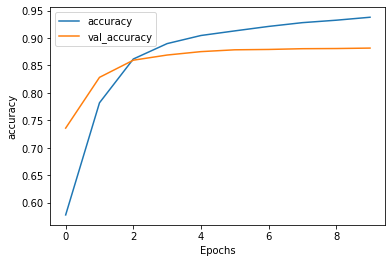

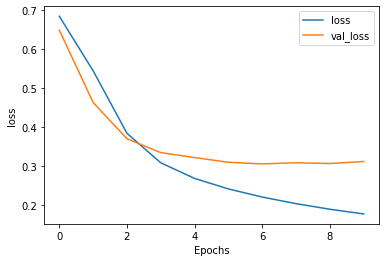

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 64)


# Exercise 2 Answer- BBC news archive

In [3]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-04-03 05:56:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2021-04-03 05:56:16 (102 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [7]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [8]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [9]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [10]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [11]:
tokenizer = Tokenizer( num_words = vocab_size, oov_token=oov_tok)   #the maximum number of words to keep, based on word frequency. Only the most common `num_words-1` words will be kept.
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index           #It will make vocabulary of all words present in the sentences but at time of the creating sequences it will consider only max occuring(num_words).

train_sequences = tokenizer.texts_to_sequences(train_sentences ) # Transforms each text in texts to a sequence of integers.Only top num_words-1 most frequent words will be taken into account.Only words known by the tokenizer will be taken into account.
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [21]:
print(word_index)
print(len(word_index))
print(tokenizer.word_counts)

{'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'mr': 6, 'year': 7, 'also': 8, 'people': 9, 'new': 10, 'us': 11, 'one': 12, 'can': 13, 'last': 14, 't': 15, 'first': 16, 'time': 17, 'two': 18, 'government': 19, 'world': 20, 'now': 21, 'uk': 22, 'best': 23, 'years': 24, 'no': 25, 'make': 26, 'just': 27, 'film': 28, 'told': 29, 'made': 30, 'get': 31, 'music': 32, 'game': 33, 'like': 34, 'back': 35, 'many': 36, '000': 37, 'labour': 38, 'three': 39, 'well': 40, '1': 41, 'next': 42, 'bbc': 43, 'take': 44, 'set': 45, 'number': 46, 'added': 47, 'way': 48, 'market': 49, '2': 50, 'company': 51, 'may': 52, 'says': 53, 'election': 54, 'home': 55, 'off': 56, 'party': 57, 'good': 58, 'going': 59, 'much': 60, 'work': 61, '2004': 62, 'still': 63, 'win': 64, 'show': 65, 'think': 66, 'games': 67, 'go': 68, 'top': 69, 'second': 70, 'won': 71, 'million': 72, '6': 73, 'england': 74, 'firm': 75, 'since': 76, 'week': 77, 'say': 78, 'play': 79, 'part': 80, 'public': 81, 'use': 82, 'blair': 83, '3': 84, '

In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [13]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7691 - accuracy: 0.4652 - val_loss: 1.7395 - val_accuracy: 0.5281
Epoch 2/30
56/56 - 0s - loss: 1.6890 - accuracy: 0.5596 - val_loss: 1.6311 - val_accuracy: 0.5393
Epoch 3/30
56/56 - 0s - loss: 1.5505 - accuracy: 0.4955 - val_loss: 1.4768 - val_accuracy: 0.4764
Epoch 4/30
56/56 - 0s - loss: 1.3722 - accuracy: 0.4803 - val_loss: 1.2989 - val_accuracy: 0.4899
Epoch 5/30
56/56 - 0s - loss: 1.1776 - accuracy: 0.5376 - val_loss: 1.1210 - val_accuracy: 0.6022
Epoch 6/30
56/56 - 0s - loss: 0.9917 - accuracy: 0.6702 - val_loss: 0.9501 - val_accuracy: 0.7685
Epoch 7/30
56/56 - 0s - loss: 0.8199 - accuracy: 0.8174 - val_loss: 0.7975 - val_accuracy: 0.8494
Epoch 8/30
56/56 - 0s - loss: 0.6594 - accuracy: 0.9056 - val_loss: 0.6604 - val_accuracy: 0.8809
Epoch 9/30
56/56 - 0s - loss: 0.5269 - accuracy: 0.9270 - val_loss: 0.5515 - val_accuracy: 0.8876
Epoch 10/30
56/56 - 0s - loss: 0.4240 - accuracy: 0.9388 - val_loss: 0.4703 - val_accuracy: 0.8966
Epoch 11/30
56/56 -

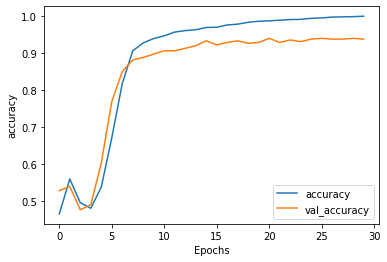

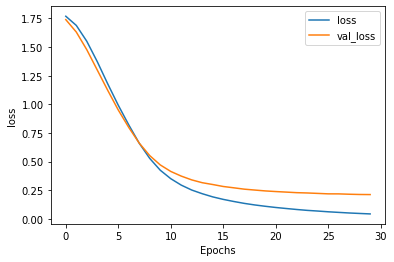

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [18]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [24]:
weights

array([[-0.06349719, -0.3462884 ,  0.3660745 , ...,  0.10131113,
         0.3204734 ,  0.20830168],
       [ 0.28800365, -0.06766436,  0.44430375, ...,  0.38438928,
         0.06339811,  0.21600603],
       [ 0.13622709, -0.40481052,  0.4277642 , ...,  0.5457895 ,
        -0.0868613 ,  0.3327957 ],
       ...,
       [ 0.1120772 ,  0.00219224,  0.07539397, ...,  0.13895303,
         0.02621411,  0.08370414],
       [ 0.51289964,  0.05446809, -0.48890623, ...,  0.5228398 ,
         0.49285427, -0.23633716],
       [-0.59345037,  0.16947517,  0.5961133 , ..., -0.31355   ,
         0.05087559, -0.14241228]], dtype=float32)